<a href="https://colab.research.google.com/github/ibrarahmed01/Student-mark-prediction/blob/main/student_marks_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Problem

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load dataset

In [10]:
path = r"https://drive.google.com/uc?export=download&id=1CPi3ecWrFZqZcKIozO2_h26QNbCl1ok6"
df =  pd.read_csv(path)

In [11]:
df.head()

,Name,Hours_studied,Attendance,Previous_score,Final_Result
0,ibrar ahmed,5,75,65,1
1,Amit verma,2,50,45,0
2,Manik verma,8,90,85,1
3,Ishfaq Ahmad,1,40,30,0
4,Ubaid Bhat,6,80,78,1


In [12]:
df.tail()

,Name,Hours_studied,Attendance,Previous_score,Final_Result
0,ibrar ahmed,5,75,65,1
1,Amit verma,2,50,45,0
2,Manik verma,8,90,85,1
3,Ishfaq Ahmad,1,40,30,0
4,Ubaid Bhat,6,80,78,1


In [13]:
df.shape

(5, 5)

# #Discover and visualize the Data to gain insights

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            5 non-null      object
 1   Hours_studied   5 non-null      int64 
 2   Attendance      5 non-null      int64 
 3   Previous_score  5 non-null      int64 
 4   Final_Result    5 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 332.0+ bytes


In [15]:
df.describe()

,Hours_studied,Attendance,Previous_score,Final_Result
count,5.000000,5.000000,5.000000,5.000000
mean,4.400000,67.000000,60.600000,0.600000
std,2.880972,21.095023,22.897598,0.547723
min,1.000000,40.000000,30.000000,0.000000
25%,2.000000,50.000000,45.000000,0.000000
50%,5.000000,75.000000,65.000000,1.000000
75%,6.000000,80.000000,78.000000,1.000000
max,8.000000,90.000000,85.000000,1.000000


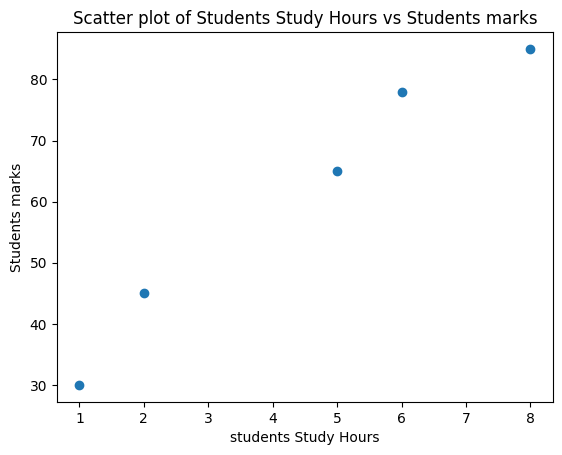

In [19]:
plt.scatter(x =df.Hours_studied, y = df.Previous_score)
plt.xlabel("students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter plot of Students Study Hours vs Students marks")
plt.show()

# Prepare the data for Machine Learning algorithms

In [20]:
# Data Cleaning

In [22]:
df.isnull().sum()

,0
Name,0
Hours_studied,0
Attendance,0
Previous_score,0
Final_Result,0


In [26]:
df.mean(numeric_only=True)

,0
Hours_studied,4.4
Attendance,67.0
Previous_score,60.6
Final_Result,0.6


In [27]:
df2 = df.fillna(df.mean(numeric_only=True))

In [28]:
df2.isnull().sum()

,0
Name,0
Hours_studied,0
Attendance,0
Previous_score,0
Final_Result,0


In [29]:
df2.head()

,Name,Hours_studied,Attendance,Previous_score,Final_Result
0,ibrar ahmed,5,75,65,1
1,Amit verma,2,50,45,0
2,Manik verma,8,90,85,1
3,Ishfaq Ahmad,1,40,30,0
4,Ubaid Bhat,6,80,78,1


In [ ]:
# Split dataset

In [38]:
X = df2.drop(['Name', 'Final_Result'], axis=1)
y = df2['Final_Result']
print("Shape of X = ",X.shape)
print("Shape of y = ",y.shape)

Shape of X =  (5, 3)
Shape of y =  (5,)


In [34]:
from sklearn.model_selection import  train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("Shape of X_train = ",X_train.shape)
print("Shape of y_train = ",y_train.shape)
print("Shape of X_test = ",X_test.shape)
print("Shape of y_test = ",y_test.shape)

Shape of X_train =  (4, 3)
Shape of y_train =  (4,)
Shape of X_test =  (1, 3)
Shape of y_test =  (1,)


# Select a Model and Train it

In [35]:
# y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [37]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
lr.coef_

array([ 0.47826087,  0.0173913 , -0.04347826])

In [40]:
lr.intercept_

np.float64(0.13043478260869135)

In [42]:
m = 3.93
c = 50.44
y = m * 4 + c
y

66.16

In [45]:
# To make a prediction, you need to provide values for all 3 features
# Let's assume a student studied 4 hours, had 70% attendance, and a previous score of 60.
lr.predict([[4, 70, 60]])[0].round(2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(0.65)

In [46]:
y_pred = lr.predict(X_test)
y_pred

array([1.82608696])

In [49]:
pd.DataFrame(np.c_[X_test,y_test, y_pred], columns = ['Hours_studied', 'Attendance', 'Previous_score', 'Final_Result_Original', 'Final_Result_Predicted'])

,Hours_studied,Attendance,Previous_score,Final_Result_Original,Final_Result_Predicted
0,8.0,90.0,85.0,1.0,1.826087


# Fine-tune your model

In [50]:
lr.score(X_test,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

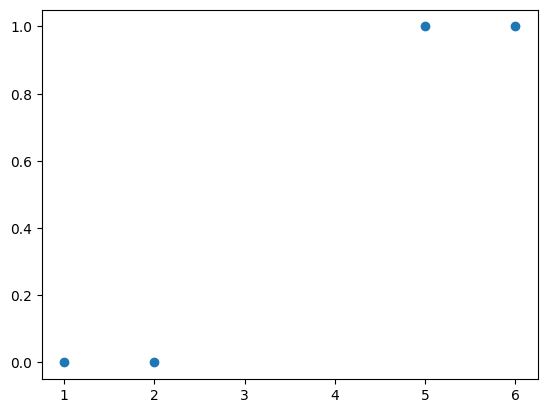

In [52]:
plt.scatter(X_train['Hours_studied'], y_train)

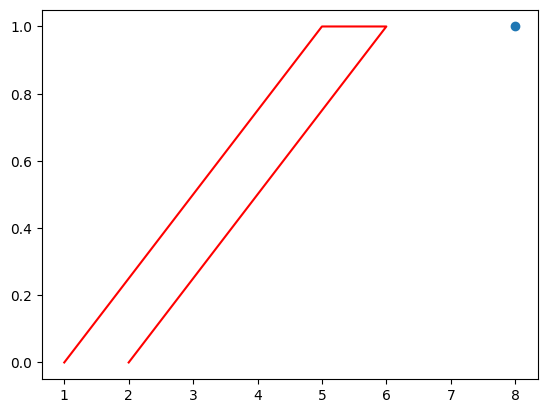

In [54]:
plt.scatter(X_test['Hours_studied'], y_test)
plt.plot(X_train['Hours_studied'], lr.predict(X_train), color='red')

# Present your Solution

save ML model

In [55]:
import joblib
joblib.dump(lr, "Students_mark_predictor_model.pkl")

['Students_mark_predictor_model.pkl']

In [56]:
model = joblib.load("Students_mark_predictor_model.pkl")

In [58]:
# Assuming a student with 5 hours studied, 70% attendance, and a previous score of 65
model.predict([[5, 70, 65]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.91304348])

# Launch,monitor, and maintain your ***system***